## K-Means

Leverage K-means to identify anomolies and cluster together the numerical variables. 

In [30]:
# Uncomment to get the correct versions
from IPython.display import clear_output
!pip install -r ../requirements.txt
clear_output() 


In [31]:
import pandas as pd 
import numpy as np 

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [34]:
RANDOM_SEED = 42 

In [35]:
df = pd.read_csv('../../data/imputed_dataset.csv')
df.head()

,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,is_drafted,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group
0,Dorial Green-Beckham,0.9997,1.0,2012,WR,78.0,220.0,37.216678,-93.292037,Springfield,MO,USA,5,Missouri,531380.0,1.0,SEC,38.935849,-92.333201,18.0,26.0,1.0,300.0,0.692308,129.726375,offense,pass_catcher
1,Mario Edwards,0.9995,2.0,2012,DT,75.0,285.0,33.215039,-97.133052,Denton,TX,USA,5,Florida State,530290.0,1.0,ACC,30.438169,-84.304403,19.0,27.0,2.0,366.0,0.703704,776.590432,defense,d_line
2,D.J. Humphries,0.9979,3.0,2012,OT,77.0,275.0,35.227200,-80.843083,Charlotte,NC,USA,5,Florida,-1009881.0,1.0,SEC,29.649936,-82.348579,15.0,26.0,2.0,178.0,0.576923,395.212334,offense,o_line
3,Shaq Thompson,0.9975,4.0,2012,S,74.0,210.0,38.581572,-121.494400,Sacramento,CA,USA,5,Washington,535329.0,1.0,Big Ten,47.650323,-122.301575,14.0,26.0,1.0,-130.0,0.538462,627.908306,defense,d_backfield
4,Noah Spence,0.9974,5.0,2012,WDE,75.0,235.0,40.266311,-76.886112,Harrisburg,PA,USA,5,Ohio State,-1027150.0,1.0,Big Ten,40.001645,-83.019727,18.0,26.0,1.0,363.0,0.692308,324.459618,defense,d_line


## Numerical Variables 


In [36]:
df.dtypes

name                               object
rating                            float64
ranking                           float64
year                                int64
position                           object
height                            float64
weight                            float64
latitude                          float64
longitude                         float64
hometown_city                      object
state_province                     object
hometown_country                   object
stars                               int64
committed_to                       object
athlete_id                        float64
is_drafted                        float64
conference                         object
latitude_school                   float64
longitude_school                  float64
wins_rolling_2year                float64
games_played_rolling_2year        float64
post_season_wins_rolling_2year    float64
point_diff_rolling_2year          float64
win_pct_rolling_2year             

In [37]:
# Features
player_info = ['name','athlete_id', 'committed_to', 'side_of_ball', 'position_group', 'state_province','hometown_country'] 
numerical_features=  ['height', 'weight', 'distance_miles']#, 'stars']#, 'win_pct_rolling_2year']


In [38]:
X = df[numerical_features]
y = df[['is_drafted']]

In [39]:
# Preprocess the numerical variables so then all the features are weigthed evenly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
X.head() 

,height,weight,distance_miles
0,78.0,220.0,129.726375
1,75.0,285.0,776.590432
2,77.0,275.0,395.212334
3,74.0,210.0,627.908306
4,75.0,235.0,324.459618


### Find the optimal amount of clusters

In [41]:
%%time 

# Determine the optimal nunmber of clusters
Sum_of_squared_distances = []
silhouette_avg = []

K = range(2,10)

for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, random_state=RANDOM_SEED)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_

    Sum_of_squared_distances.append(kmeans.inertia_)

    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))


CPU times: user 51.2 s, sys: 15.1 s, total: 1min 6s
Wall time: 50.6 s


In [42]:
# Silhouette Score 
max_index = silhouette_avg.index(max(silhouette_avg))
max_num_clusters = max_index+2
print(max(silhouette_avg))



0.40405076318249306


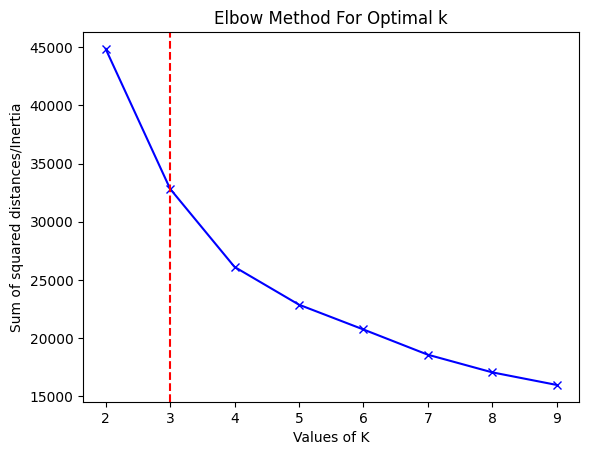

In [43]:
# Elbow method 
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.axvline(x=max_num_clusters, color='red', linestyle='--', label='Optimal K')
plt.title('Elbow Method For Optimal k')
plt.show()

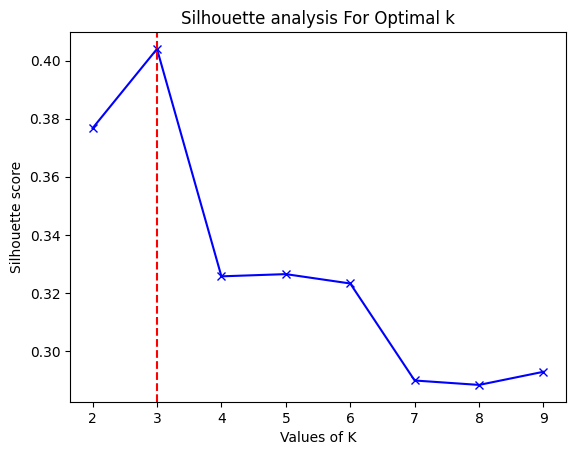

In [44]:
plt.plot(K,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.axvline(x=max_num_clusters, color='red', linestyle='--', label='Optimal K')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [45]:
    # plt.plot(K,silhouette_avg,’bx-’)


### Optimal Clusters

Based on the silhoutte score and the squared mean error, the optimal amount of clusters is 4. 

In [46]:
# Apply KMeans clustering on the standardized data
kmeans = KMeans(n_clusters=max_num_clusters, random_state=RANDOM_SEED)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [47]:
# Get the cluster centers and the labels (which cluster each data point belongs to)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [48]:
# results


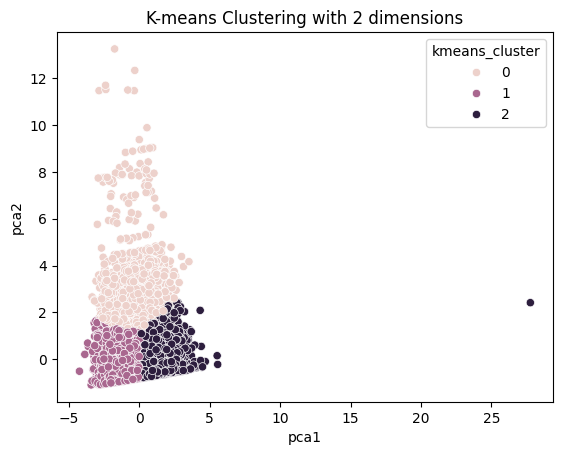

In [49]:
from sklearn.decomposition import PCA
import seaborn as sns 

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results["kmeans_cluster"] = kmeans.labels_

results.head()

sns.scatterplot(x="pca1", y="pca2", hue=results['kmeans_cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [50]:
# Save the assigned cluster and the pca values to df 
df['k_means_cluster'] = results['kmeans_cluster']
df['k_means_pca1'] = results['pca1']
df['k_means_pca2'] = results['pca2']

In [51]:
# Euclidean Distance usd to measure the distance between the center and the points 
# Considered far if it's 3 std away from the mean
distances = np.linalg.norm(X_scaled - centers[labels], axis=1)
threshold = np.mean(distances) + 3 * np.std(distances) 
far_points_indices = np.where(distances > threshold)[0]



In [52]:
# Save distance to df 
df['k_means_distance_to_centroid'] = distances


In [53]:
# Show the far points in the dataframe
df_far_points = df.iloc[far_points_indices]


In [54]:
print(f"Number of points far from their centroid: {df_far_points.shape[0]}")


Number of points far from their centroid: 168


In [55]:
# Prepare to export the data 
additional_features = ['k_means_cluster', 'k_means_pca1', 'k_means_pca2','k_means_distance_to_centroid']
anomoly_df = df_far_points[player_info + numerical_features + additional_features].sort_values(by='k_means_distance_to_centroid', ascending=False)



In [56]:
anomoly_df.head()

,name,athlete_id,committed_to,side_of_ball,position_group,state_province,hometown_country,height,weight,distance_miles,k_means_cluster,k_means_pca1,k_means_pca2,k_means_distance_to_centroid
7676,Marques Moore,3125868.0,Kent State,defense,linebacker,OH,USA,74.0,2000.0,41.260357,2,27.761461,2.418011,38.507158
16279,Marquez Ezzard,4362505.0,Miami,athlete,athlete,NaN,USA,73.0,213.0,7833.078474,0,-1.749393,13.244703,10.515736
18059,Brandon Joseph,NaN,Georgia State,offense,o_line,NaN,USA,74.0,280.0,7242.867348,0,-0.317969,12.327961,9.548723
21015,Jack Zergiotis,4428977.0,UConn,offense,qb,NaN,USA,72.0,180.0,7016.742209,0,-2.391424,11.693003,9.099982
16665,Arquon Bush,4360067.0,Cincinnati,defense,d_backfield,NaN,USA,71.0,167.0,6916.389684,0,-2.855190,11.463679,8.991996


In [57]:
# Export potential anomoly sortd by distance
anomoly_df.to_csv('../../data/k_means_possible_anomoly.csv')


In [58]:
df.head() 

,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,is_drafted,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group,k_means_cluster,k_means_pca1,k_means_pca2,k_means_distance_to_centroid
0,Dorial Green-Beckham,0.9997,1.0,2012,WR,78.0,220.0,37.216678,-93.292037,Springfield,MO,USA,5,Missouri,531380.0,1.0,SEC,38.935849,-92.333201,18.0,26.0,1.0,300.0,0.692308,129.726375,offense,pass_catcher,2,1.188510,-0.460820,1.214539
1,Mario Edwards,0.9995,2.0,2012,DT,75.0,285.0,33.215039,-97.133052,Denton,TX,USA,5,Florida State,530290.0,1.0,ACC,30.438169,-84.304403,19.0,27.0,2.0,366.0,0.703704,776.590432,defense,d_line,2,1.238614,0.738786,1.095132
2,D.J. Humphries,0.9979,3.0,2012,OT,77.0,275.0,35.227200,-80.843083,Charlotte,NC,USA,5,Florida,-1009881.0,1.0,SEC,29.649936,-82.348579,15.0,26.0,2.0,178.0,0.576923,395.212334,offense,o_line,2,1.714273,0.087522,0.531779
3,Shaq Thompson,0.9975,4.0,2012,S,74.0,210.0,38.581572,-121.494400,Sacramento,CA,USA,5,Washington,535329.0,1.0,Big Ten,47.650323,-122.301575,14.0,26.0,1.0,-130.0,0.538462,627.908306,defense,d_backfield,1,-0.180239,0.313150,0.953086
4,Noah Spence,0.9974,5.0,2012,WDE,75.0,235.0,40.266311,-76.886112,Harrisburg,PA,USA,5,Ohio State,-1027150.0,1.0,Big Ten,40.001645,-83.019727,18.0,26.0,1.0,363.0,0.692308,324.459618,defense,d_line,2,0.544966,-0.162231,0.685787


In [59]:
df.to_csv('../../data/k_means_clusters.csv')
